In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/House Price Prediction Dataset.csv')

In [ ]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
print(df.shape)

(2000, 10)


In [ ]:
df['Price_per_sqft'] = df['Price'] / df['Area']
df['House_Age'] = 2025 - df['YearBuilt']

In [ ]:
nulls=df.isnull().sum()
print(nulls)

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


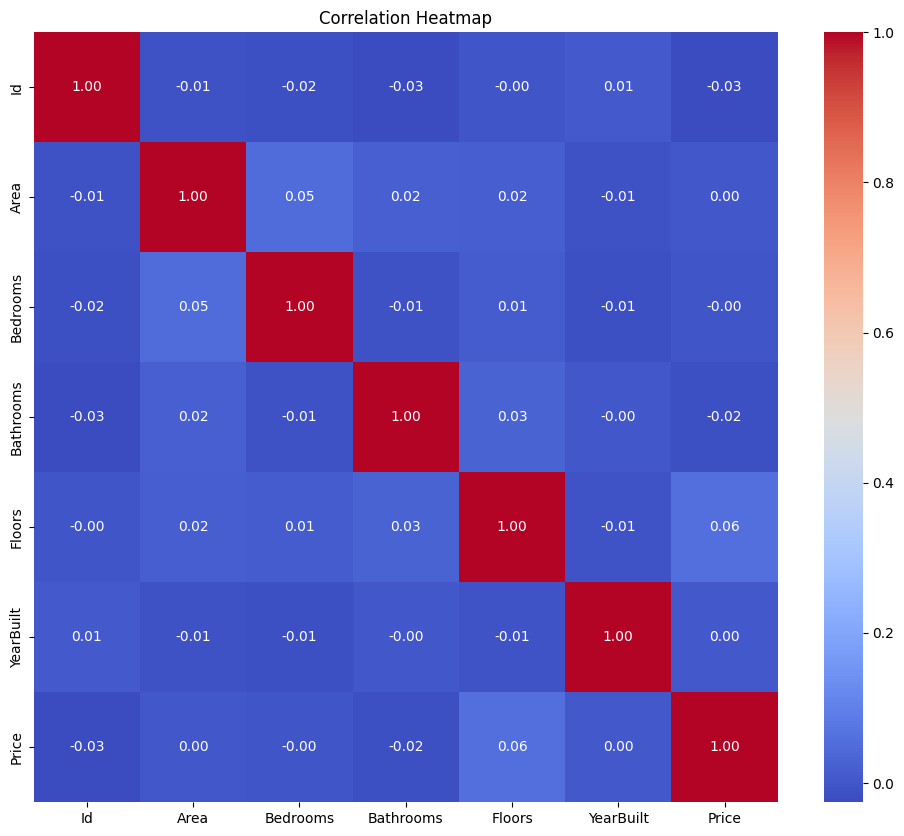

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True,fmt=".2f", cmap="coolwarm" )
plt.title("Correlation Heatmap")
plt.show()

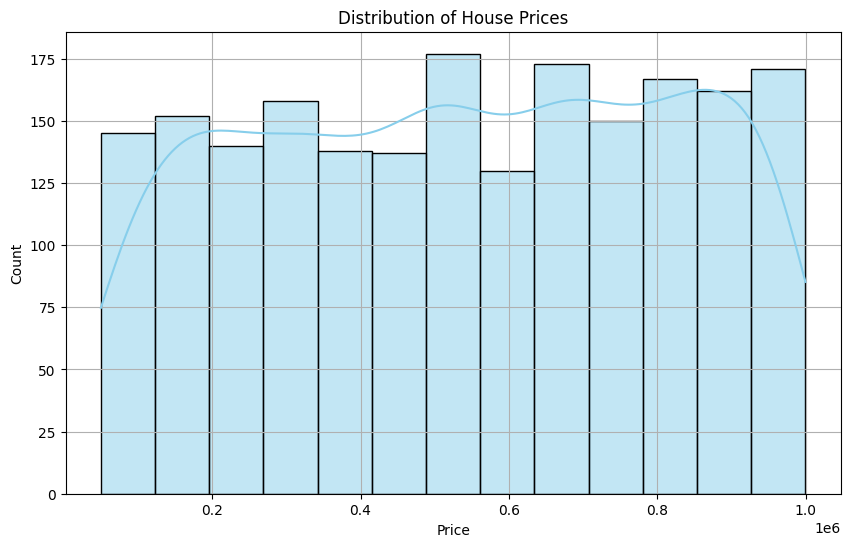

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(True)
plt.show()

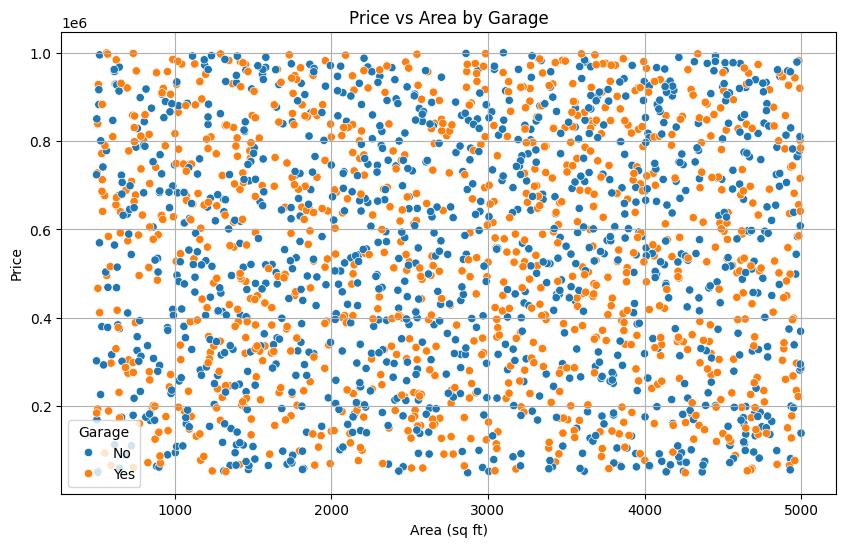

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area', y='Price', hue='Garage')
plt.title("Price vs Area by Garage")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.grid(True)
plt.show()

/tmp/ipython-input-16-2683889195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Location', y='Price', palette='Set2')


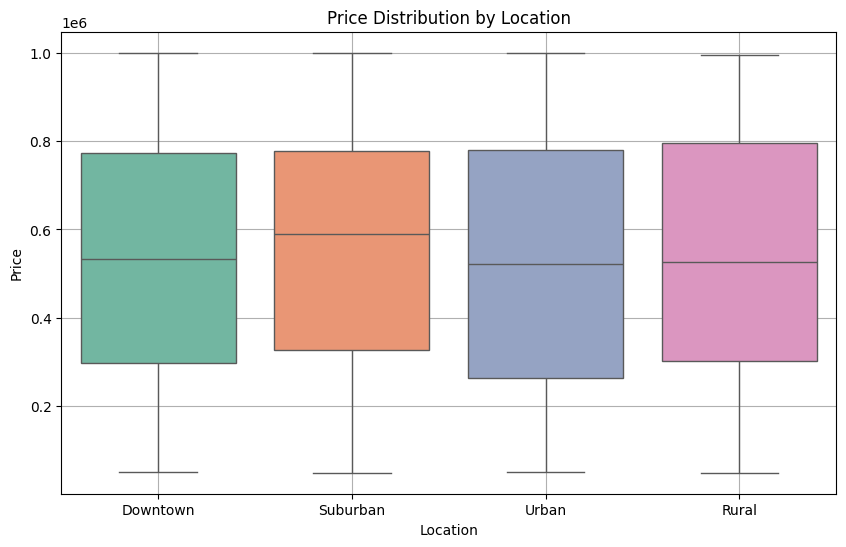

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Location', y='Price', palette='Set2')
plt.title("Price Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.grid(True)
plt.show()


/tmp/ipython-input-17-1593466747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Bedrooms', palette='pastel')


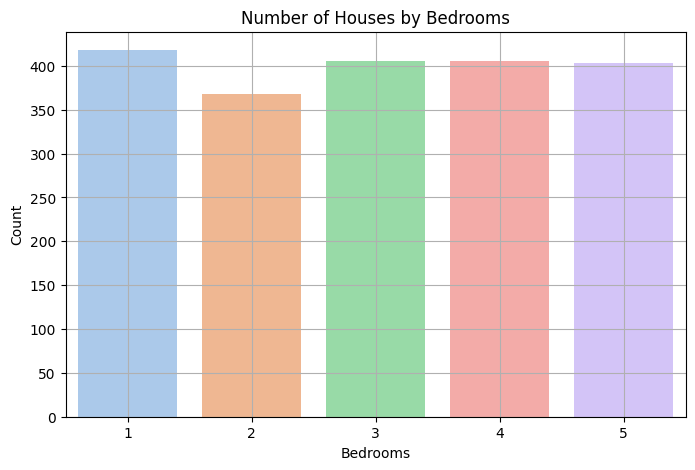

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Bedrooms', palette='pastel')
plt.title("Number of Houses by Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

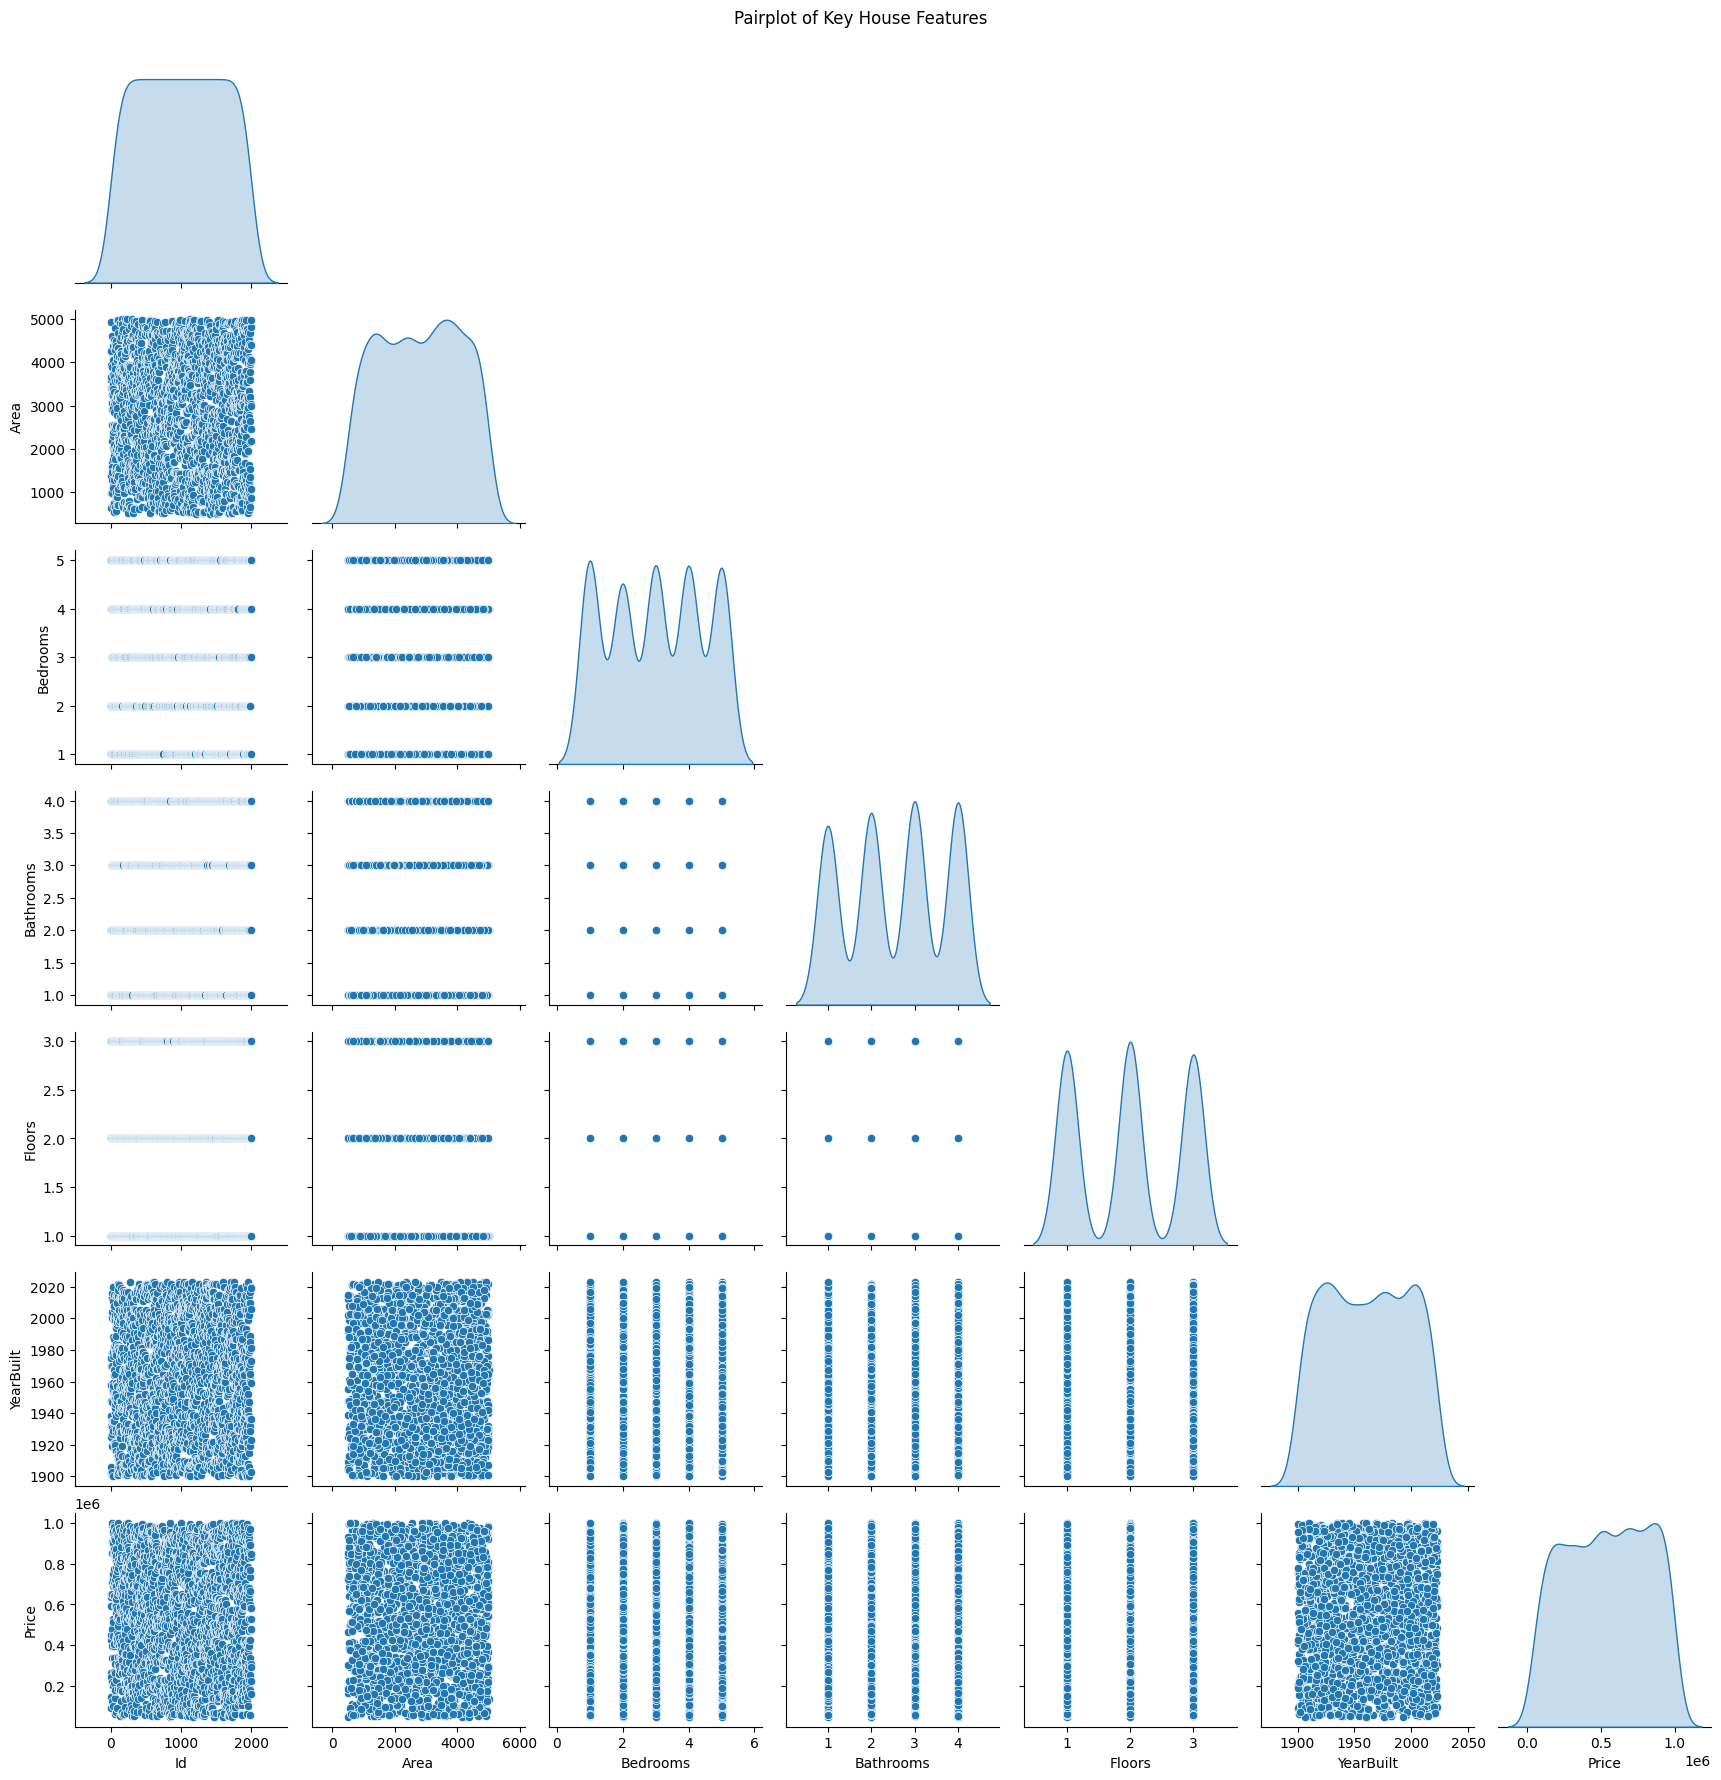

In [ ]:
key_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Price']
plt.figure(figsize=(10, 6))
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Key House Features", y=1.02)
plt.show()

<Axes: xlabel='Price'>

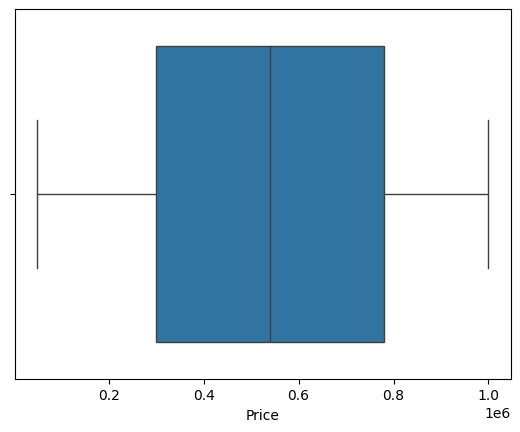

In [ ]:
sns.boxplot(x=df['Price'])

In [ ]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = numerical_df.drop(columns=['Id', 'Price'])
y = numerical_df['Price']

In [ ]:
print(y.value_counts())

Price_Category
2    1100
1     588
0     312
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def price_category(price):
    if price < 200000:
        return 0
    elif price < 500000:
        return 1
    else:
        return 2

df['Price_Category'] = df['Price'].apply(price_category)

numeric_df = df.select_dtypes(include='number')
X = numeric_df.drop(columns=['Id', 'Price', 'Price_Category'])
y = df['Price_Category']

In [ ]:
Logistic_Regression_model= LogisticRegression(max_iter=2000,class_weight='balanced')
Support_Vector_Machine_model= SVC()
KNearest_Neighbors_model= KNeighborsClassifier(n_neighbors=5)

In [ ]:
Logistic_Regression_model.fit(X_train, y_train)
SVM_pred = Support_Vector_Machine_model.fit(X_train, y_train).predict(X_test)
KNN_pred = KNearest_Neighbors_model.fit(X_train, y_train).predict(X_test)

LR_pred = Logistic_Regression_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, LR_pred))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, SVM_pred))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, KNN_pred))

Logistic Regression Accuracy: 0.31
Support Vector Machine Accuracy: 0.55
K-Nearest Neighbors Accuracy: 0.4475


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(X_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Gradient Boosting Accuracy: 0.54


In [ ]:
import gradio as gr

In [ ]:
def predict_price_category(area, bedrooms, bathrooms, floors, year_built):
    input_data = pd.DataFrame([[area, bedrooms, bathrooms, floors, year_built]],
                              columns=X.columns)
    input_scaled = scaler.transform(input_data)
    pred = model.predict(input_scaled)[0]
    category = {0: "Low", 1: "Medium", 2: "High"}
    return f"Predicted Price Category: {category[pred]}"

interface = gr.Interface(
    fn=predict_price_category,
    inputs=[
        gr.Number(label="Area (sq ft)"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Bathrooms"),
        gr.Number(label="Floors"),
        gr.Number(label="Year Built")
    ],
    outputs="text",
    title="House Price Category Predictor",
    description="Predicts whether a house is Low, Medium, or High priced based on features."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4761a2d57595114d57.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
